# Part 1: Data preprocessing

Dataset link: https://www.kaggle.com/datasets/d4rklucif3r/restaurant-reviews?select=Restaurant_Reviews.tsv

## Importing the lib and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# creating a variable dataset to read the dataset
# delimeter is used as \t because the dataset is int .tsv
# The delimiter parameter tells pandas how the columns in the file are separated.
# quoting = 3 to remove all the double quotings
# quoting=3: Indicates that quotes in the file should be treated as regular characters,
# with no special meaning.

dataset = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter ='\t', quoting=3)

In [7]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Data Exploration

In [8]:
dataset.shape

(1000, 2)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [11]:
dataset.columns

Index(['Review', 'Liked'], dtype='object')

In [12]:
# statistical summary
dataset.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


## Dealing with missing values

In [13]:
dataset.isnull().values.any()

False

## Countplot

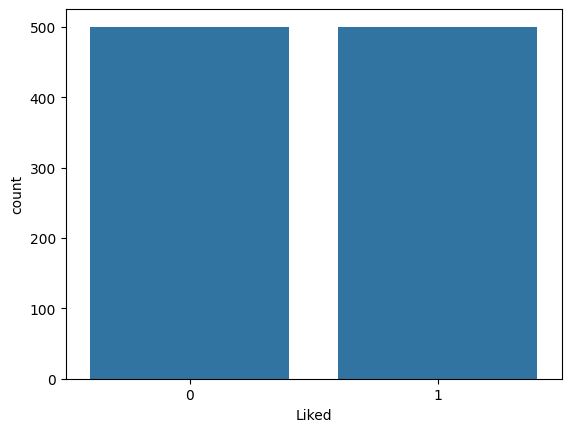

In [16]:
sns.countplot(x='Liked', data=dataset)
plt.show()

In [17]:
# Getting the exact count of positive reviews
(dataset.Liked == 1).sum()

500

In [18]:
# Getting the exact count of negative reviews
(dataset.Liked == 0).sum()

500

## Length of messages

In [19]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [20]:
# Creating a new column to Length to get the len of the sentence
dataset['Length'] = dataset['Review'].apply(len)

In [21]:
dataset.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


<Axes: ylabel='Frequency'>

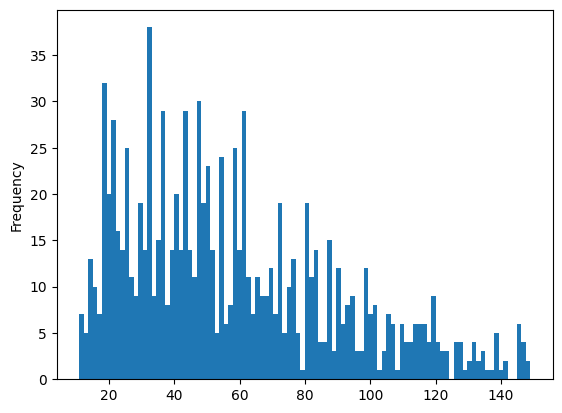

In [23]:
# Histogram
# The bins parameter determines how the data is divided into intervals (bins) for the histogram.
# The kind parameter specifies the type of plot you want to create.
# In this case, kind='hist' indicates that you want to create a histogram.

dataset['Length'].plot(bins=100, kind='hist')

Average length of characters in a message is around 60

In [24]:
dataset.Length.describe()

,Length
count,1000.000000
mean,58.315000
std,32.360052
min,11.000000
25%,33.000000
50%,51.000000
75%,80.000000
max,149.000000


In [25]:
# Longest message
dataset[dataset['Length']== 149]['Review'].iloc[0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [26]:
# Shortest message
dataset[dataset['Length']== 11]['Review'].iloc[0]

'DELICIOUS!!'

In [27]:
# creating variables
positive = dataset[dataset['Liked'] == 1]

In [28]:
negative = dataset[dataset['Liked'] == 0]

In [29]:
positive

,Review,Liked,Length
0,Wow... Loved this place.,1,24
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
8,The fries were great too.,1,25
9,A great touch.,1,14
...,...,...,...
899,"Overall, a great experience.",1,28
901,Their regular toasted bread was equally satisf...,1,97
907,The chips and sals a here is amazing!!!!!!!!!!...,1,55
909,This is my new fav Vegas buffet spot.,1,37


In [30]:
negative

,Review,Liked,Length
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
5,Now I am getting angry and I want my damn pho.,0,46
6,Honeslty it didn't taste THAT fresh.),0,37
7,The potatoes were like rubber and you could te...,0,111
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


## Cleaning the text

In [31]:
# Importing the libraries
# re is regular expression library
# nltk is natural language processing library

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [33]:
# creating a list that will store the cleaned and processed reviews.
# line uses regular expressions (re.sub) to remove any characters that are not letters (a-z or A-Z).
# Everything else (numbers, punctuation, etc.) is replaced with a space
# The review text is converted to lowercase to ensure that the processing is case-insensitive
# split the reviews into a list of words.
# initialize the Porter Stemmer, which is a tool used to reduce words to their root form (e.g., "running" becomes "run").

# all_stopwords = stopwords.words('english')
# This loads a list of common English stopwords (e.g., "the", "is", "in")
# that don't add much meaning to the text and are often removed.

# all_stopwords.remove('not')
# removes the word "not" from the stopwords list

# review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
# Only keeps words that are not in the stopwords list
# Reduces each word to its root form.

# This takes the list of words and joins them back into a single string,
# with each word separated by a space.

corpus = []

for i in range(0,1000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()

  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

It removes unwanted characters, converts text to lowercase, splits it into words, removes stopwords (except "not"), stems the words to their root form, and then recombines them into a cleaned string.

In [34]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

In [35]:
len(corpus)

1000

## Create the Bag of Words Model

In [37]:
# Creating sparse matrix
# rows will contain different reviews and column will conatin all diffrent words


In [38]:
# CountVectorizer is a tool used to convert a collection of text documents into a matrix of token counts
# (basically, it counts the frequency of each word in the text).

from sklearn.feature_extraction.text import CountVectorizer

In [39]:
# CountVectorizer to keep only the top 1500 most frequent words (features) in the text corpus.
# If there are more than 1500 unique words in your text data,
# it will keep only the 1500 most common ones

cv = CountVectorizer(max_features= 1500)

In [40]:
dataset.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [49]:
# CountVectorizer to the corpus (learning the vocabulary from the text) and
# then transforms the corpus into a matrix. Each row in this matrix corresponds to a review,
# and each column corresponds to a word in the 1500 most frequent words.
# The values in the matrix represent the count of each word in each review.
# .toarray(): Converts the matrix into a NumPy array so it's easier to work with
# dataset.iloc[:, 1] selects all rows (:) from the second column (1) of the dataset.
# iloc is used for integer-based indexing.

x = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,1]

In [50]:
x.shape

(1000, 1500)

In [51]:
y.shape

(1000,)

## Split the dataset

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [45]:
x_train.shape

(800, 1500)

In [46]:
x_test.shape

(200, 1500)

In [47]:
y_train.shape

(800,)

In [48]:
y_test.shape

(200,)

# Part 2: Model Building

## Naive bayes

In [52]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(x_train, y_train)

GaussianNB()

In [54]:
y_pred = classifier_nb.predict(x_test)

In [55]:
# Evalute the performs of this machine learning model

from sklearn.metrics import accuracy_score, confusion_matrix

In [56]:
acc = accuracy_score(y_test, y_pred)
print(acc*100)

68.0


In [57]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[55 50]
 [14 81]]


There are total 50 + 14 incorrect predictions which is 64

## XGBoost classier

In [62]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [63]:
y_pred = classifier_xgb.predict(x_test)

In [64]:
acc = accuracy_score(y_test, y_pred)
print(acc*100)

76.5


In [65]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[89 16]
 [31 64]]


The incorrect predictions are the diagonaly opp ones 31 + 16 which is 47 which is good for xgboost than in naive bayes

# Final model(XGBoost Classifier)

In [66]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [67]:
y_pred = classifier_xgb.predict(x_test)

In [68]:
acc = accuracy_score(y_test, y_pred)
print(acc*100)

76.5


In [69]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[89 16]
 [31 64]]
